# Diferansiyel Evrim Algoritması ile Future Selection

"https://github.com/JingweiToo/Wrapper-Feature-Selection-Toolbox-Python" adresi üzerinden alınmış veri seti ile beraber Future Selection yapılmıştır. Burada ki amaç veri seti içerisinde ki verilerin optimal olanlarının belirlenmesi ve kullanılmasıdır. 



İlk olarak Python dili ile yazılmasına karar verilmiş olan Future Selection için gerekli kütüphanelerin implamantasyonu yapılmıştır. 

In [21]:
import numpy as np
import pandas as pd
from sys import exit
import matplotlib.pyplot as plt

Daha sonrasında veri seti içerisinde her seferinde aynı verilerin alınması ve incelenmesini engellemek amacıyla rastgele seçim methodları yazılmıştır. 

In [22]:
rand = np.random.rand
choice = np.random.choice
clip = np.clip
argmin = np.argmin
min = np.min

Veri seti içerisinden verilerin alınması ve daha sonrasında Diferansiyel Evrim Algoritması tarafında kullanılması için bir definasyon yazılmıştır. Bu definasyon verileri alarak ebeveynleri oluşturmaktadır. 

In [23]:
# veri olusturucu fonksiyon
def veri_olustur(x):
	return x[0]**2.0 + x[1]**2.0

Daha sonrasında Diferansiyel Evrim Algoritmasında kullanılacak olan  mutasyon,sınır kontorlü ve çaprazlama operasyonları için ayrı ayrı 3 definasyon oluşturulmuştur.

In [24]:
# mutasyon fonksiyonu
def mutasyon(x, F):
	return x[0] + F * (x[1] - x[2])

# boundary kontrol eden fonksiyon
def bounds_kontrol(mutated, bounds):
	mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
	return mutated_bound

# caprazlama yapan fonksiyon
def caprazlama(mutated, target, dims, cr):
	# her dim icin ayri random value uret
	p = rand(dims)
	# binom caprazlama
	trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
	return trial

Diferansiyel Evrim algoritması içinde bir definasyon oluşturulmuştur. Burada öncelikle bir random seçim uygulanmaktadır. Amaç veriseti içerisinden verilerin seçilmesi ebeveyn olarak kullanılmasıdır. Bu ebeveynler başlangıç popülasyonu içersinde yer alır ve ilk iterasyon bu Futureler üzerinden yapılır. Kullanıcı tarafından belirlenen iterasyon sayısı kadar iterasyon işlemi başlar. En iyi 3 aday seçilir ve Diferansiyel Evrim algoritması operasyonları uygulanır. Bu işlem uygulandıkça döngü içerisinde ki en iyi değerler seçilir ve saklanır. Bu değerler veri seti içerisinde ki kullanılabilir verileri temsil etmektedir. 

In [25]:
def diferansiyel_evrim(pop_size, bounds, iter, F, cr):
	# random secim yap
	pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
	# baslangic popunu ayarla
	obj_all = [veri_olustur(ind) for ind in pop]
	# baslangic popundaki en iyiyi bul
	best_vector = pop[argmin(obj_all)]
	best_obj = min(obj_all)
	prev_obj = best_obj
	# iter sayisi kadar
	for i in range(iter):
		# pop sayisi kadar iterasyonlari calistir
		for j in range(pop_size):
			# 3 aday bul
			candidates = [candidate for candidate in range(pop_size) if candidate != j]
			a, b, c = pop[choice(candidates, 3, replace=False)]
			# mutasyon yap
			mutated = mutasyon([a, b, c], F)
			# mutasyondan sonraki lower ve upperleri bul
			mutated = bounds_kontrol(mutated, bounds)
			# caprazlama yap
			trial = caprazlama(mutated, pop[j], len(bounds), cr)
			# herefi belirle
			obj_target = veri_olustur(pop[j])
			# hedef degerini hesapla
			obj_trial = veri_olustur(trial)
			# hedeften secim yap
			if obj_trial < obj_target:
				# hedefi deneme vektoruyle degistirin
				pop[j] = trial
				# yeni degere ata
				obj_all[j] = obj_trial
		# her iter sonrasi en iyi degeri sakla
		best_obj = min(obj_all)
		# en dusuk yanlisa sahip degeri sakla
		if best_obj < prev_obj:
			best_vector = pop[argmin(obj_all)]
			prev_obj = best_obj
			# her yineleme sonrasi kotrol edip degerleri degistir
	return best_vector

Kullanıcı tarafında Future Selection işlemi yapılacak veri setinin girişinin yapılması için bir kod yazılmıştır. Burada kullanıcı istediği veri setinin ismini girerek işlemin başlatılmasını sağlar.



In [27]:
# datayi oku
try:
	data  = pd.read_csv(input('Veriseti dosya ismini giriniz: '))
	# data  = pd.read_csv('test.csv')
	veriler  = data.values
except:
	print("Dosya okunurken sorun olustu.")
	exit(1)

print("Islemler baslatildi.")

Veriseti dosya ismini giriniz: ionosphere.csv
Islemler baslatildi.


Burada Diferansiyel Evrim Algoritması içerisinde kullanılcak olan parametreler kullanıcı tarafından belirlenmekte ve yazılmaktadır. 

In [64]:
# pop boyutu
pop_boyutu = 20
# iterasyon sayisi
iterasyon_carpani = 1000
# mutasyon carpani
mutasyon_carpani = 0.2
# caprazlama carpani
cc = 0.9

Diferansiyel Evrim Algoritması yukarıda bir definasyon olarak çalışmaktadır. Bu sebep ile burada o definasyonu çağırmakta ve çalıştırmaktayız. 

In [65]:
# diferansiyel evrimi calistir
try:
	solution = diferansiyel_evrim(pop_boyutu, veriler, iterasyon_carpani, mutasyon_carpani, cc)
except:
	print("Diferansiyel evrim yapilirken sorun olustu.")
	exit(1)

Seçilen sonuçlar içerisinde Null veriler bulunuyorsa onları sonuç kısmından çıkarıyoruz ve kalanlardan kaç tane değer seçildiğini görüyoruz. 

In [66]:
# gelen sonuc secindeki sifir olmayan alanlari alip, boyutunu ekrana yazdiriyoruz
solution = solution[solution != 0]
print("Sonuc sayisi:", len(solution))

Sonuc sayisi: 32


Son olarak Diferanyel Evrim Algoritmamızın ne kadar iyi çalıştığını göstermek için bir plot yazılmıştır. Burada amaç seçilen verileri doğruluğunu kontrol etmektir.

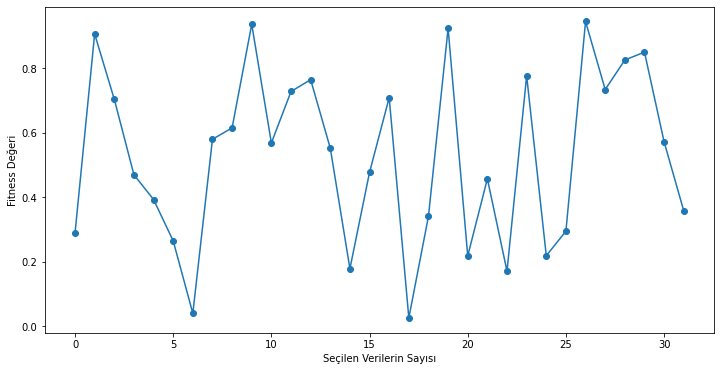

In [67]:



plt.figure(figsize=(12,6))

plt.plot(solution, 'o-')
plt.xlabel("Seçilen Verilerin Sayısı")
plt.ylabel("Fitness Değeri")
plt.show()


